In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
train_data = np.genfromtxt('datasets/KNN/regression/trainingData.csv', delimiter = ",")
test_data = np.genfromtxt('datasets/KNN/regression/testData.csv', delimiter = ",")

In [3]:
train_data.shape

(6400, 13)

In [4]:
test_data.shape

(1600, 13)

# KNN Steps:

## 1) Read the data

## 2) For each query instance, calculate the distance with the training instances

## 3) Consider K nearest neighbors based on the distance calculated in 2nd step

## 4) Assign average / mean value of the K nearest neighbors as our predicted value for the query instance

# Function to calculate euclidean distance

In [5]:
def calculate_euclidean_distance(training_features, query_features):
    return np.sqrt(np.sum(np.square(query_features-training_features), axis=1))

# Function to predict using K-nearest neighbors

In [6]:
arr1 = np.array([2,1,3,6,5,4])

In [7]:
np.argsort(arr1)

array([1, 0, 2, 5, 4, 3], dtype=int64)

In [12]:
def predict(train_data, test_data):
    k = 3
    distances = calculate_euclidean_distance(train_data[:,0:-1], test_data[0:-1])
    
    indices = np.argsort(distances)
    predicted_value = np.mean(train_data[indices[0:k], -1])
    
    return predicted_value

In [9]:
def calculate_r2(actual_target_values, predicted_target_values):
    sum_squared_residuals = np.sum(
                                   np.square(predicted_target_values - actual_target_values)
                                  )
    
    sum_squares = np.sum(
                         np.square(np.mean(actual_target_values) - actual_target_values)
                        )
    
    r2 = 1 - (sum_squared_residuals/sum_squares)
    
    return r2
    

In [13]:
start_time = time.process_time()

predictions = []

for i in range(len(test_data)):
    predicted_value = predict(train_data, test_data[i])
    predictions.append(predicted_value)

r2_score = calculate_r2(test_data[:, -1], np.array(predictions))

end_time = time.process_time()

print("R2 Score is: ", r2_score)
print("Time taken: ", end_time-start_time)

R2 Score is:  0.8165934427865968
Time taken:  1.40625


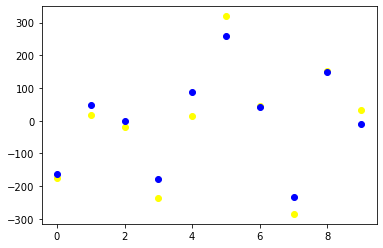

In [19]:
plt.scatter(np.arange(10), test_data[0:10, -1], color= 'yellow')
plt.scatter(np.arange(10), predictions[0:10], color= 'blue')

In [20]:
df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)

In [21]:
df_train.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.004362,0.007072,0.000705,0.008373,-0.011065,0.022645,-0.000628,0.014265,0.003355,-0.004684,-0.017824,0.004609
1,-0.004362,1.000000,-0.020603,-0.001333,-0.005931,0.008843,0.008947,-0.004167,-0.021844,0.004767,0.004464,-0.005987,-0.001219
2,0.007072,-0.020603,1.000000,0.000111,-0.014672,0.014021,-0.010896,-0.008521,0.000466,-0.013469,0.002297,-0.013291,-0.022593
3,0.000705,-0.001333,0.000111,1.000000,-0.000592,0.020930,0.003464,0.018884,-0.009665,-0.013561,0.014955,0.000111,0.006303
4,0.008373,-0.005931,-0.014672,-0.000592,1.000000,0.018053,0.000553,0.006604,-0.018079,0.001130,-0.007775,-0.002404,0.000415
5,-0.011065,0.008843,0.014021,0.020930,0.018053,1.000000,0.010928,0.009479,0.009403,-0.014863,0.013834,0.009100,0.009425
6,0.022645,0.008947,-0.010896,0.003464,0.000553,0.010928,1.000000,0.000829,0.004241,-0.012111,-0.014598,0.001990,0.500095
7,-0.000628,-0.004167,-0.008521,0.018884,0.006604,0.009479,0.000829,1.000000,-0.015647,-0.008439,0.006654,-0.010313,0.484448
8,0.014265,-0.021844,0.000466,-0.009665,-0.018079,0.009403,0.004241,-0.015647,1.000000,0.016315,-0.005209,-0.027966,0.152783
9,0.003355,0.004767,-0.013469,-0.013561,0.001130,-0.014863,-0.012111,-0.008439,0.016315,1.000000,0.013414,0.000968,0.466152


In [22]:
new_train_data = train_data[:, [6,7,8,9,11,12]]
new_test_data = test_data[:, [6,7,8,9,11,12]]

In [23]:
start_time = time.process_time()

predictions = []

for i in range(len(new_test_data)):
    predicted_value = predict(new_train_data, new_test_data[i])
    predictions.append(predicted_value)

r2_score = calculate_r2(new_test_data[:, -1], np.array(predictions))

end_time = time.process_time()

print("R2 Score is: ", r2_score)
print("Time taken: ", end_time-start_time)

R2 Score is:  0.9597535566295161
Time taken:  0.90625


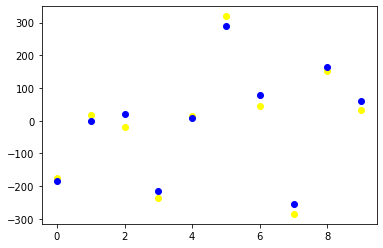

In [24]:
plt.scatter(np.arange(10), new_test_data[0:10, -1], color= 'yellow')
plt.scatter(np.arange(10), predictions[0:10], color= 'blue')

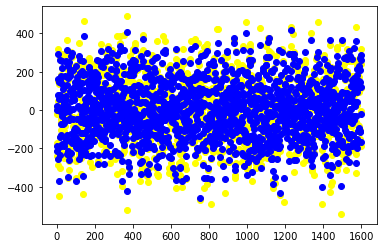

In [25]:
plt.scatter(np.arange(len(new_test_data)), new_test_data[:, -1], color= 'yellow')
plt.scatter(np.arange(len(new_test_data)), predictions, color= 'blue')